What is the most optimal skill to learn for Data Analysts?

Methodology

1. Group skills to deternime median salary and likelihood of being in posting
2. Visualize median salary vs percent skill demand 
3. (Optional) Determine if certain technologies are more prevalent


In [68]:
# Importing Libararies
import ast
import pandas as pd 
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt 

# Loading data 
dataset = load_dataset('lukebarousse/data_jobs')
df =dataset['train'].to_pandas()

# Data Cleaning
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) and pd.notnull(x) else x)

In [69]:
# df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()
df_DA_CA = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'Canada')].copy()

In [70]:
df_DA_CA =df_DA_CA.dropna(subset=['salary_year_avg'])

df_DA_CA_exploded = df_DA_CA.explode('job_skills')

df_DA_CA_exploded[['salary_year_avg','job_skills']].head()

,salary_year_avg,job_skills
48811,105000.0,sql
48811,105000.0,python
48811,105000.0,javascript
48811,105000.0,bigquery
48811,105000.0,tableau


In [71]:
df_DA_skills = df_DA_CA_exploded.groupby('job_skills')['salary_year_avg'].agg(['count','median']).sort_values('count',ascending=False)

df_DA_skills = df_DA_skills.rename(columns={'count': 'skill_count', 'median': 'median_salary'})

df_DA_skills 

DA_job_count = len(df_DA_CA)

df_DA_skills['skill_percent'] = df_DA_skills['skill_count'] / DA_job_count * 100

skill_percent = 7

df_DA_skills_high_demend = df_DA_skills[df_DA_skills['skill_percent'] > skill_percent]

df_DA_skills_high_demend



# DA_job_count = len(df_DA_CA)

# df_DA_skills['skill_percent'] = df_DA_skills['skill_count'] / DA_job_count * 100

# skill_percent = 5

# df_DA_skills_high_demand = df_DA_skills[df_DA_skills['skill_percent'] > skill_percent]

# df_DA_skills_high_demand

,skill_count,median_salary,skill_percent
job_skills,,,
sql,17,99150.00,54.838710
python,14,99825.00,45.161290
tableau,10,98825.00,32.258065
excel,9,98500.00,29.032258
sas,8,98500.00,25.806452
power bi,5,75000.00,16.129032
vba,4,84500.00,12.903226
sheets,4,99500.00,12.903226
spark,4,109795.25,12.903226


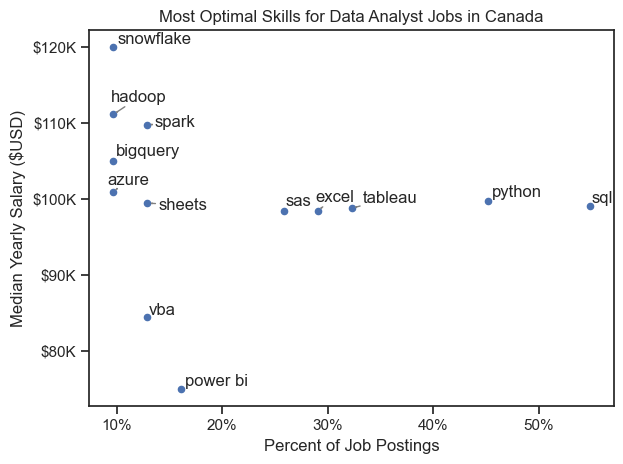

In [73]:
from adjustText import adjust_text


df_DA_skills_high_demend.plot(kind='scatter',x='skill_percent', y='median_salary')

texts = []

for i, txt in enumerate(df_DA_skills_high_demend.index):
    texts.append(plt.text(df_DA_skills_high_demend['skill_percent'].iloc[i], df_DA_skills_high_demend['median_salary'].iloc[i], txt))

adjust_text(texts, arrowprops=dict(arrowstyle="->", color='grey', lw=1))

from matplotlib.ticker import PercentFormatter
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))

plt.xlabel('Percent of Job Postings')
plt.ylabel("Median Yearly Salary ($USD)")
plt.title('Most Optimal Skills for Data Analyst Jobs in Canada')
plt.tight_layout()
plt.show()

In [74]:
df['job_type_skills'].head(10)

0                                                 None
1    {'analyst_tools': ['power bi', 'tableau'], 'pr...
2    {'analyst_tools': ['dax'], 'cloud': ['azure'],...
3    {'cloud': ['aws'], 'libraries': ['tensorflow',...
4    {'cloud': ['oracle', 'aws'], 'other': ['ansibl...
5    {'cloud': ['gcp'], 'programming': ['python', '...
6    {'cloud': ['gcp', 'bigquery'], 'databases': ['...
7    {'cloud': ['gcp', 'azure', 'aws', 'bigquery', ...
8    {'analyst_tools': ['excel', 'powerpoint', 'pow...
9    {'analyst_tools': ['excel'], 'cloud': ['azure'...
Name: job_type_skills, dtype: object

In [77]:
df_technology = df['job_type_skills'].copy()

df_technology =df_technology.drop_duplicates()

df_technology =df_technology.dropna()

# combine all dictionaries into one
technology_dict = {}
for row in df_technology:
    row_dict =ast.literal_eval(row) # convert string to dictionary
    for key, value in row_dict.items():
        if key in technology_dict: # if key already exists in technology_dict, add the value
            technology_dict[key] += value
        else: # if key does not exist in technology_dict, create the key and add the value
            technology_dict[key] = value

# remove duplicates by converting values to set then boack to list
for key, value in technology_dict.items():
    technology_dict[key] = list(set(value))

technology_dict

{'analyst_tools': ['powerbi',
  'splunk',
  'spss',
  'cognos',
  'sap',
  'sharepoint',
  'looker',
  'esquisse',
  'qlik',
  'outlook',
  'msaccess',
  'tableau',
  'excel',
  'sheets',
  'ssis',
  'powerpoint',
  'datarobot',
  'dax',
  'power bi',
  'visio',
  'alteryx',
  'spreadsheet',
  'sas',
  'microstrategy',
  'nuix',
  'ms access',
  'word',
  'ssrs'],
 'programming': ['r',
  'visualbasic',
  'scala',
  'mongo',
  'fortran',
  'haskell',
  'php',
  'shell',
  'typescript',
  'sql',
  'groovy',
  'cobol',
  'rust',
  'go',
  'swift',
  't-sql',
  'objective-c',
  'vba',
  'golang',
  'vb.net',
  'delphi',
  'python',
  'no-sql',
  'html',
  'elixir',
  'f#',
  'bash',
  'lisp',
  'lua',
  'perl',
  'apl',
  'ocaml',
  'c#',
  'solidity',
  'ruby',
  'crystal',
  'kotlin',
  'julia',
  'visual basic',
  'sass',
  'assembly',
  'pascal',
  'powershell',
  'java',
  'c++',
  'erlang',
  'sas',
  'nosql',
  'mongodb',
  'javascript',
  'clojure',
  'dart',
  'css',
  'c',
  'mat

In [80]:
df_technology = pd.DataFrame(list(technology_dict.items()), columns=['technology', 'skills'])

df_technology = df_technology.explode('skills')

df_technology

,technology,skills
0,analyst_tools,powerbi
0,analyst_tools,splunk
0,analyst_tools,spss
0,analyst_tools,cognos
0,analyst_tools,sap
...,...,...
9,sync,twilio
9,sync,google chat
9,sync,wire
9,sync,symphony


In [85]:
df_plot = df_DA_skills_high_demend.merge(df_technology, left_on='job_skills', right_on='skills', how='left')

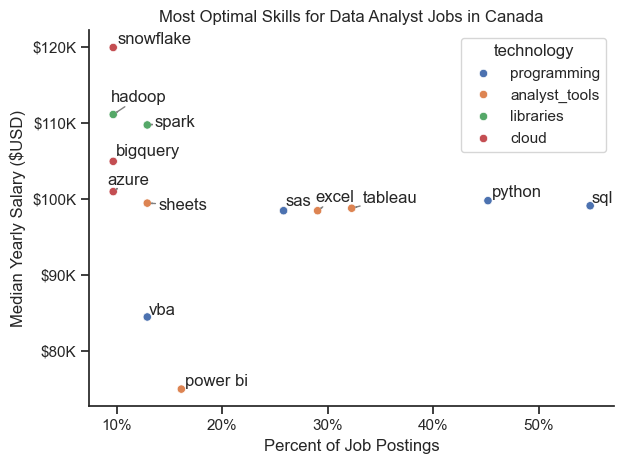

In [90]:
from adjustText import adjust_text


# df_plot.plot(kind='scatter',x='skill_percent', y='median_salary')

sns.scatterplot(
    data=df_plot,
    x='skill_percent',
    y='median_salary',
    hue='technology'
)

sns.despine()
sns.set_theme(style='ticks')

texts = []

for i, txt in enumerate(df_DA_skills_high_demend.index):
    texts.append(plt.text(df_DA_skills_high_demend['skill_percent'].iloc[i], df_DA_skills_high_demend['median_salary'].iloc[i], txt))

adjust_text(texts, arrowprops=dict(arrowstyle="->", color='grey', lw=1))

from matplotlib.ticker import PercentFormatter
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))

plt.xlabel('Percent of Job Postings')
plt.ylabel("Median Yearly Salary ($USD)")
plt.title('Most Optimal Skills for Data Analyst Jobs in Canada')
plt.tight_layout()
plt.show()


In [ ]:
df['job_type_skills'].head(10)

0                                                 None
1    {'analyst_tools': ['power bi', 'tableau'], 'pr...
2    {'analyst_tools': ['dax'], 'cloud': ['azure'],...
3    {'cloud': ['aws'], 'libraries': ['tensorflow',...
4    {'cloud': ['oracle', 'aws'], 'other': ['ansibl...
5    {'cloud': ['gcp'], 'programming': ['python', '...
6    {'cloud': ['gcp', 'bigquery'], 'databases': ['...
7    {'cloud': ['gcp', 'azure', 'aws', 'bigquery', ...
8    {'analyst_tools': ['excel', 'powerpoint', 'pow...
9    {'analyst_tools': ['excel'], 'cloud': ['azure'...
Name: job_type_skills, dtype: object

In [ ]:
df_technology = df['job_type_skills'].copy()

df_technology =df_technology.drop_duplicates()

df_technology =df_technology.dropna()

# combine all dictionaries into one
technology_dict = {}
for row in df_technology:
    row_dict =ast.literal_eval(row) # convert string to dictionary
    for key, value in row_dict.items():
        if key in technology_dict: # if key already exists in technology_dict, add the value
            technology_dict[key] += value
        else: # if key does not exist in technology_dict, create the key and add the value
            technology_dict[key] = value

# remove duplicates by converting values to set then boack to list
for key, value in technology_dict.items():
    technology_dict[key] = list(set(value))

technology_dict


{'analyst_tools': ['powerbi',
  'splunk',
  'spss',
  'cognos',
  'sap',
  'sharepoint',
  'looker',
  'esquisse',
  'qlik',
  'outlook',
  'msaccess',
  'tableau',
  'excel',
  'sheets',
  'ssis',
  'powerpoint',
  'datarobot',
  'dax',
  'power bi',
  'visio',
  'alteryx',
  'spreadsheet',
  'sas',
  'microstrategy',
  'nuix',
  'ms access',
  'word',
  'ssrs'],
 'programming': ['r',
  'visualbasic',
  'scala',
  'mongo',
  'fortran',
  'haskell',
  'php',
  'shell',
  'typescript',
  'sql',
  'groovy',
  'cobol',
  'rust',
  'go',
  'swift',
  't-sql',
  'objective-c',
  'vba',
  'golang',
  'vb.net',
  'delphi',
  'python',
  'no-sql',
  'html',
  'elixir',
  'f#',
  'bash',
  'lisp',
  'lua',
  'perl',
  'apl',
  'ocaml',
  'c#',
  'solidity',
  'ruby',
  'crystal',
  'kotlin',
  'julia',
  'visual basic',
  'sass',
  'assembly',
  'pascal',
  'powershell',
  'java',
  'c++',
  'erlang',
  'sas',
  'nosql',
  'mongodb',
  'javascript',
  'clojure',
  'dart',
  'css',
  'c',
  'mat

In [ ]:
df_technology = pd.DataFrame(list(technology_dict.items()), columns=['technology', 'skills'])

df_technology = df_technology.explode('skills')

df_technology

,technology,skills
0,analyst_tools,powerbi
0,analyst_tools,splunk
0,analyst_tools,spss
0,analyst_tools,cognos
0,analyst_tools,sap
...,...,...
9,sync,twilio
9,sync,google chat
9,sync,wire
9,sync,symphony


In [ ]:
df_plot = df_DA_skills_high_demend.merge(df_technology, left_on='job_skills', right_on='skills', how='inner')

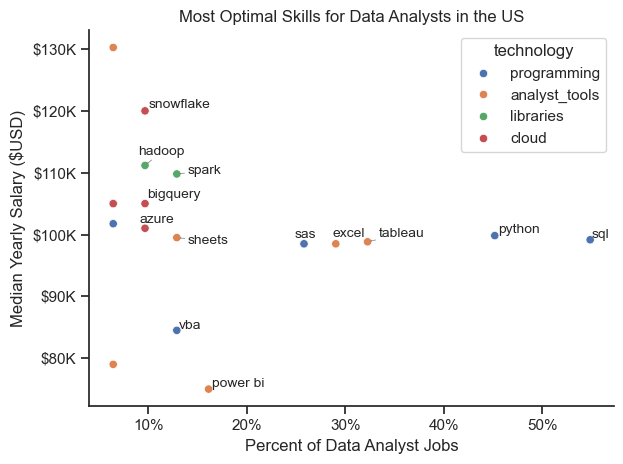

In [ ]:
from adjustText import adjust_text
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

# Assuming df_plot and df_DA_skills_high_demend are already defined

# Create the scatter plot
sns.scatterplot(data=df_plot, x='skill_percent', y='median_salary', hue='technology')
sns.despine()
sns.set_theme(style='ticks')

# Initialize the list for text objects
texts = []

# Add text labels to the plot
for i, txt in enumerate(df_DA_skills_high_demend.index):
    texts.append(plt.text(df_DA_skills_high_demend['skill_percent'].iloc[i], 
                          df_DA_skills_high_demend['median_salary'].iloc[i], 
                          txt, 
                          bbox=dict(facecolor='white', alpha=0),  # Add background color
                          fontsize=10))  # Adjust font size if needed

# Set plot labels and title
plt.xlabel('Percent of Data Analyst Jobs')
plt.ylabel("Median Yearly Salary ($USD)")
plt.title('Most Optimal Skills for Data Analysts in the US')

# Adjust text to avoid overlap
adjust_text(texts, 
            arrowprops=dict(arrowstyle="->", color='grey', lw=0.5),
            force_text=.5  # Increase force to separate text labels
            )  # Increase force to separate text labels from points

# Format the axes
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))

# Adjust layout and show the plot
plt.tight_layout()
plt.show()